## 第七次练习

+ 请务必交到exer7文件夹下，**谢绝交到master下**
+ 请不要改动任何文件，拜托
+ 请在12月20日前提交。

请写一下姓名和学号：
+ 姓名  
+ 学号

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [3]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [4]:
#请参考下面命令将CEPS.csv数据读入python

In [5]:
df = pd.read_csv('CEPS.csv',encoding='gb2312')
df.head()


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (20,22,23,25,28,29,39,49,74,124,125,126,127,128,129,130,131,138,140,141,147,160,161,162,165,170,174,175,176,177,179,180,181,182,183,184,188,191,194,195,196,199,221,222,223,224,251,252,254,289,290,294,295,296) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ids,clsids,schids,ctyids,frame,subsample,sweight,fall,grade9,stcog,...,steco_3c,stonly,stsib,stsibrank,stmedu,stfedu,stprhedu,stfdrunk,stprfight,stprrel
0,1,1,1,1,3,3,218.738892,0,0,11,...,3,1,,,3,3,3,1,1,2
1,2,1,1,1,3,3,216.518234,0,0,17,...,2,1,,,8,5,8,1,1,2
2,3,1,1,1,3,3,216.518234,0,0,12,...,2,2,1,3,3,3,3,1,1,1
3,4,1,1,1,3,3,218.738892,0,0,10,...,2,1,,,6,7,7,1,1,2
4,5,1,1,1,3,3,217.553040,0,0,10,...,3,1,,,7,8,8,1,1,2


下面的图都至少需要在图上标注：
+ 图标题
+ x轴标题
+ y轴标题
+ 适当修改x轴或者y轴的刻度及标签，使之清晰美观
+ 根据需要添加图例

### 散点图
反映期中考试标准化成绩语文（stdchn）和期中考试标准化成绩数学（stdmat）的相关关系

In [6]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

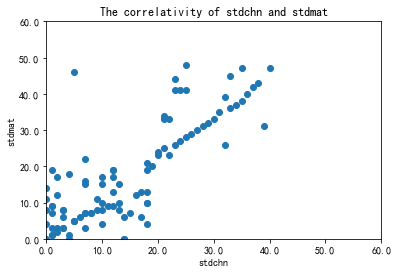

In [7]:
xminorLocator   = MultipleLocator(10) #将x主刻度标签设置为10的倍数
xminorFormatter = FormatStrFormatter('%1.1f') #设置x轴标签文本的格式

ymajorLocator   = MultipleLocator(10) #将y轴主刻度标签设置为10的倍数
ymajorFormatter = FormatStrFormatter('%1.1f') #设置y轴标签文本的格式


fig=plt.figure()
ax=fig.add_subplot(111)
ax.set_title('The correlativity of stdchn and stdmat',fontdict=None,loc='center')
chn=df.stdchn[:100]
mat=df.stdmat[:100]
ax.set_xlabel('stdchn')
ax.set_ylabel('stdmat')

ax.xaxis.set_major_locator(xminorLocator )
ax.xaxis.set_major_formatter(xminorFormatter)

ax.yaxis.set_major_locator(ymajorLocator)
ax.yaxis.set_major_formatter(ymajorFormatter)

ax.set_xlim(0,60)
ax.set_ylim(0,60)

plt.scatter(chn,mat)
plt.show()

### 饼图
对问题“你是独生子女吗”(b01)的回答有“是”和“否”两种回答，相应的数字分别是1和2。请画一个饼图反映二者的比例。

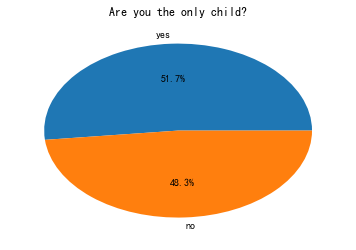

In [8]:
labels=['yes','no']
y=df.b01[:1000]
kong=[]
for n in y:
    n=float(n)
    kong.append(n)
y=kong.count(1)
n=kong.count(2)
sizes=[y,n]
fig=plt.figure()
plt.pie(sizes,labels=labels,autopct='%1.1f%%')
plt.title("Are you the only child?")
plt.show()

### 直方图
反映变量“每天晚上睡多长时间-小时”(b18a)的分布情况。

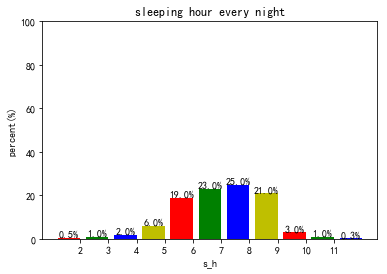

In [15]:
X=df.b18a[0:1000]
sleep_hour=['2','3','4','5','6','7','8','9','10','11','12']
num_percent=[0.5,1,2,6,19,23,25,21,3,1,0.3]
rects=plt.bar(range(len(num_percent)),num_percent,color='rgby')

index=[float(c)+0.4 for c in [0,1,2,3,4,5,6,7,8,9]]
plt.ylim(ymax=100,ymin=0)
plt.xticks(index,sleep_hour)
plt.ylabel("percent(%)")
plt.xlabel("s_h")
for rect in rects:
    height=rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2,height,str(height)+'%',ha='center',va='bottom')
plt.title("sleeping hour every night")
plt.show()

### 柱图
反映变量"你妈妈是做什么工作的"(b08a)的职业分布情况，数字和编码关系如下：

+ 1	国家机关事业单位领导与工作人员
+ 2	企业/公司中高级管理人员
+ 3	教师、工程师、医生、律师
+ 4	技术工人（包括司机）
+ 5	生产与制造业一般职工
+ 6	商业与服务业一般职工
+ 7	个体户
+ 8	农民
+ 9 无业、失业、下岗


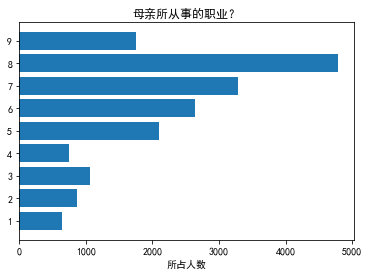

In [36]:
x1=sum(df.b08a=='1')
x2=sum(df.b08a=='2')
x3=sum(df.b08a=='3')
x4=sum(df.b08a=='4')
x5=sum(df.b08a=='5')
x6=sum(df.b08a=='6')
x7=sum(df.b08a=='7')
x8=sum(df.b08a=='8')
x9=sum(df.b08a=='9')
name_list=['1','2','3','4','5','6','7','8','9']
num_list=[x1,x2,x3,x4,x5,x6,x7,x8,x9]
plt.barh(range(len(num_list)),num_list,tick_label=name_list)
plt.xlabel("所占人数")
plt.title("母亲所从事的职业？")
plt.show()
